## Workflow compare synthetic community to native human microbiota data from the MetaCardis study
Forslund, S.K., Chakaroun, R., Zimmermann-Kogadeeva, M. et al. Combinatorial, additive and dose-dependent drug–microbiome associations. Nature 600, 500–505 (2021). https://doi.org/10.1038/s41586-021-04177-9


Data can be downloaded from https://zenodo.org/records/6242715

In [52]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

%matplotlib inline
#%matplotlib qt

In [2]:
# define data folder
human_data_folder = '..\\InputData\\human_microbiome_data\\'

In [3]:
# define figure folder
figure_folder = '..\\Figures\\'

In [5]:
mydata = pd.read_csv(human_data_folder + 'hub.cellcount.motu.Phylum.v2.data.frame.r',
                    sep='\t')

In [6]:
# pivot table to have samples vs features matrix
mydatatable = pd.pivot_table(mydata, values='FeatureValue',
                             index=['SampleID'],
                            columns = ['Feature'])

In [7]:
# normalize features to 1 (compositional data)
mydatatable_norm = mydatatable.div(mydatatable.sum(axis=1), axis=0)

In [8]:
mydatatable_norm

Feature,Acidobacteria,Actinobacteria,Aquificae,Bacteroidetes,Chlamydiae,Chlorobi,Chloroflexi,Chrysiogenetes,Crenarchaeota,Cyanobacteria,...,Planctomycetes,Proteobacteria,Spirochaetes,Synergistetes,Tenericutes,Thaumarchaeota,Thermodesulfobacteria,Thermotogae,Verrucomicrobia,unclassified
SampleID,,,,,,,,,,,,,,,,,,,,,
x10MCx1134,0.0,0.005796,0.0,0.217918,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001216,0.0,0.0,0.0,0.0,0.0,0.0,0.012789,0.621895
x10MCx1135,0.0,0.024177,0.0,0.489427,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.006216,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.350304
x10MCx1138,0.0,0.006391,0.0,0.716887,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.034657,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.117172
x10MCx1140,0.0,0.019180,0.0,0.267957,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.003387,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.523847
x10MCx1143,0.0,0.000253,0.0,0.810251,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.003729,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.139298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x30MCx3394,0.0,0.007345,0.0,0.332852,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.030489,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.452019
x30MCx3412,0.0,0.030944,0.0,0.559131,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.022090,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.262674
x30MCx3414,0.0,0.006607,0.0,0.450798,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.004311,0.0,0.0,0.0,0.0,0.0,0.0,0.001770,0.437675


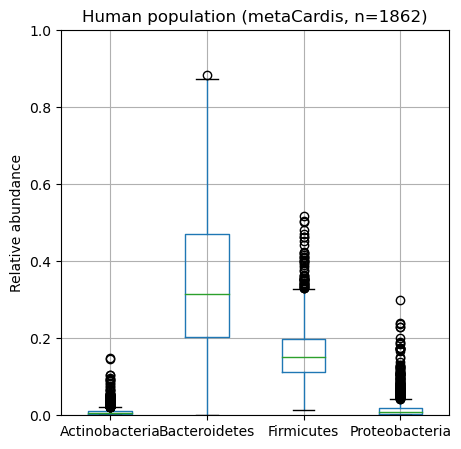

In [10]:
# plot distributions of relative phylum abundances in human samples
fig = plt.figure(figsize=(5, 5))
mydatatable_norm.boxplot(column = ['Actinobacteria', 'Bacteroidetes', 
                                    'Firmicutes', 'Proteobacteria'])
ax = plt.gca()
ax.set_ylim([0, 1])
ax.set_ylabel('Relative abundance')
ax.set_title('Human population (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')')
plt.savefig( figure_folder + 'metacardis_phylum_distribution.pdf',
                format='pdf',
                bbox_inches='tight')

## Check on species level representation of the 14 community

In [11]:
mydata_species = pd.read_csv(human_data_folder + 'hub.cellcount.motu.Species.v2.data.frame.r',
                    sep='\t')

In [12]:
# pivot table to have samples vs features
mydata_species_table = pd.pivot_table(mydata_species, values='FeatureValue',
                             index=['SampleID'],
                            columns = ['Feature'])

In [13]:
# normalize relative abundance
mydata_species_table = mydata_species_table.div(mydata_species_table.sum(axis=1), axis=0) 

In [14]:
my_species = ['Bacteroides_uniformis',
             'Bacteroides_thetaiotaomicron',
             'Bacteroides_ovatus',
             'Bacteroides_caccae',
             'Bacteroides_stercoris',
             'Parabacteroides_distasonis',
             'Bifidobacterium_adolescentis',
             'Collinsella_aerofaciens',
             'Escherichia_coli',
             'Marvinbryantia_formatexigens',
             'Clostridium_symbiosum',
             '_Ruminococcus__obeum',#'Blautia_obeum',
             'Clostridium_scindens',
             '_Ruminococcus__torques']

In [15]:
set(my_species).intersection(mydata_species_table.columns)

{'Bacteroides_caccae',
 'Bacteroides_ovatus',
 'Bacteroides_stercoris',
 'Bacteroides_thetaiotaomicron',
 'Bacteroides_uniformis',
 'Bifidobacterium_adolescentis',
 'Clostridium_scindens',
 'Clostridium_symbiosum',
 'Collinsella_aerofaciens',
 'Escherichia_coli',
 'Marvinbryantia_formatexigens',
 'Parabacteroides_distasonis',
 '_Ruminococcus__obeum',
 '_Ruminococcus__torques'}

In [16]:
findspecies = 'torques'#'obeum'
[test for test in mydata_species_table.columns if test.find(findspecies)>0]

['_Ruminococcus__torques']

In [17]:
mydata_species_table_selected = mydata_species_table.loc[:,my_species].copy()

In [18]:
mydata_species_table_selected.to_csv('metacardis_selected_species_abundance.csv')

In [19]:
mydata_species_table_selected_prevalence = mydata_species_table_selected.copy()
mydata_species_table_selected_prevalence = mydata_species_table_selected_prevalence.fillna(0)

In [20]:
mydata_species_table_selected_prevalence = mydata_species_table_selected_prevalence>0

In [21]:
myspecies_prevalence = mydata_species_table_selected_prevalence.sum(axis=0)*100/mydata_species_table_selected_prevalence.shape[0]

In [25]:
print("Median prevalence: ", np.median(myspecies_prevalence))

Median prevalence:  83.02900107411385


In [26]:
print("Mean prevalence: ", np.mean(myspecies_prevalence))

Mean prevalence:  69.77903943532301


In [27]:
mysort = ['Marvinbryantia_formatexigens',
          'Clostridium_symbiosum',
          '_Ruminococcus__obeum',
          'Clostridium_scindens',
          '_Ruminococcus__torques',
          'Bifidobacterium_adolescentis',
          'Collinsella_aerofaciens',
          'Bacteroides_ovatus',
          'Bacteroides_caccae',
          'Bacteroides_thetaiotaomicron',
          'Bacteroides_uniformis',
          'Bacteroides_stercoris',
          'Parabacteroides_distasonis',
          'Escherichia_coli']

In [28]:
myspecies_prevalence

Feature
Bacteroides_uniformis           97.099893
Bacteroides_thetaiotaomicron    91.621912
Bacteroides_ovatus              95.112782
Bacteroides_caccae              72.771214
Bacteroides_stercoris           61.117078
Parabacteroides_distasonis      91.031149
Bifidobacterium_adolescentis    67.776584
Collinsella_aerofaciens         85.338346
Escherichia_coli                80.719656
Marvinbryantia_formatexigens     0.644468
Clostridium_symbiosum           30.128894
_Ruminococcus__obeum            92.427497
Clostridium_scindens            15.306122
_Ruminococcus__torques          95.810956
dtype: float64

In [29]:
myspecies_prevalence = myspecies_prevalence.loc[mysort]

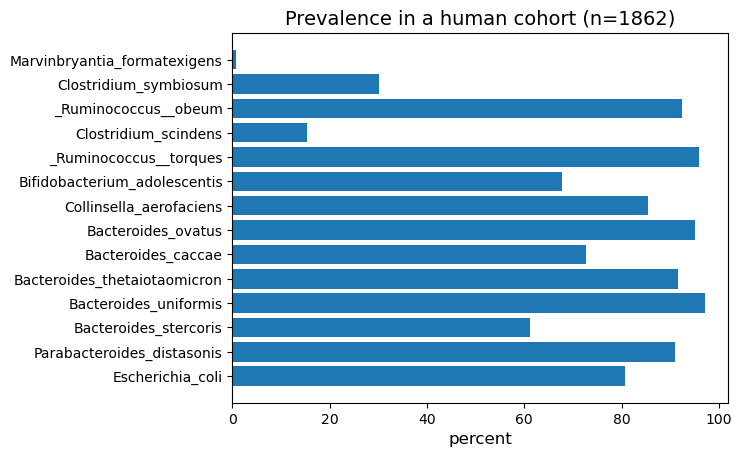

In [34]:
fig, ax = plt.subplots()
ax.barh(range(len(myspecies_prevalence)), myspecies_prevalence)
ax.set_yticks(range(len(myspecies_prevalence)))
ax.set_yticklabels(myspecies_prevalence.index)
#ax.set_ylim([0, 130]) 
#ax.set_aspect('equal')#, 'box')
# Add labels and title
plt.xlabel('percent', fontsize=12)
#plt.ylabel('number of people', fontsize=12)
plt.title('Prevalence in a human cohort (n='+str(mydata_species_table_selected_prevalence.shape[0])+')', fontsize=14)
plt.gca().invert_yaxis()
#plt.hist(percent_overlap_kegg, bins=50)
plt.savefig( 'myspecies_prevalence_humans.pdf',
                format='pdf',
                bbox_inches='tight')

(array([ 24.,  66., 114.,  93.,  96.,  86.,  84.,  77.,  67.,  83.,  76.,
         66.,  58.,  58.,  60.,  40.,  59.,  45.,  43.,  30.,  38.,  30.,
         34.,  38.,  22.,  27.,  12.,  21.,  22.,  16.,  18.,  22.,  13.,
         21.,  12.,  19.,  12.,   6.,  16.,   8.,   7.,   9.,   8.,   9.,
          5.,   6.,   9.,   5.,   8.,   4.,   5.,   1.,   1.,   3.,   5.,
          3.,   5.,   2.,   4.,   0.,   1.,   1.,   2.,   1.,   0.,   2.,
          2.,   2.,   1.,   0.,   1.,   1.,   3.,   1.,   1.,   0.,   0.,
          1.,   0.,   2.,   0.,   1.,   1.,   1.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.]),
 array([0.00145769, 0.00794057, 0.01442344, 0.02090632, 0.0273892 ,
        0.03387208, 0.04035496, 0.04683784, 0.05332071, 0.05980359,
        0.06628647, 0.07276935, 0.07925223, 0.08573511, 0.09221798,
        0.09870086, 0.10518374, 0.11166662, 0.1181495 , 0.12463237,
        0.13111525, 0.13759813, 0.14408101, 0.

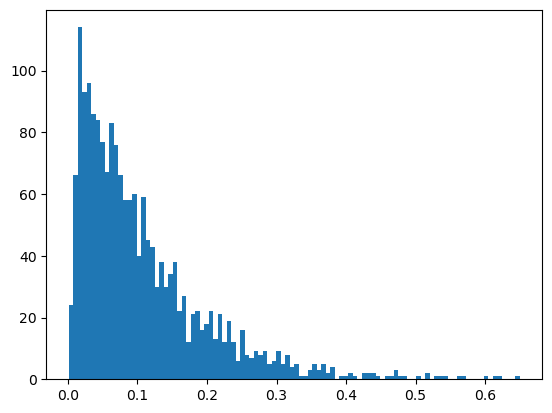

In [35]:
plt.hist(mydata_species_table_selected.sum(axis=1),bins=100)

In [36]:
mydata_species_table_selected.sum(axis=1).mean()

0.1066382736096075

In [37]:
mydata_species_table_selected.sum(axis=1).median()

0.07918211825704266

(array([  3.,   7.,  22.,  35.,  72., 184., 342., 554., 501., 142.]),
 array([ 2. ,  3.1,  4.2,  5.3,  6.4,  7.5,  8.6,  9.7, 10.8, 11.9, 13. ]),
 <BarContainer object of 10 artists>)

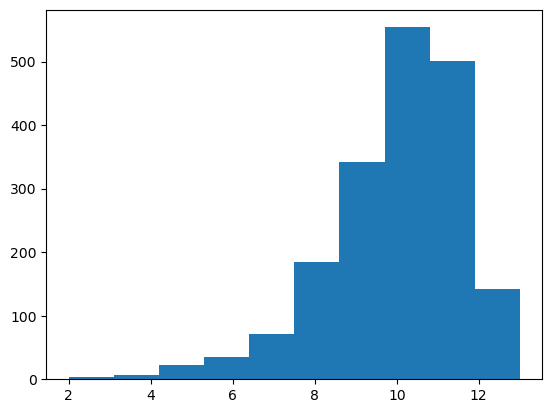

In [38]:
plt.hist((mydata_species_table_selected>0).sum(axis=1), bins=10)

In [39]:
((mydata_species_table_selected>0).sum(axis=1)>10).sum()

643

In [40]:
# normalize relative abundance by 14
mydata_species_table_selected_norm = mydata_species_table_selected.div(mydata_species_table_selected.sum(axis=1), axis=0) 

<Axes: >

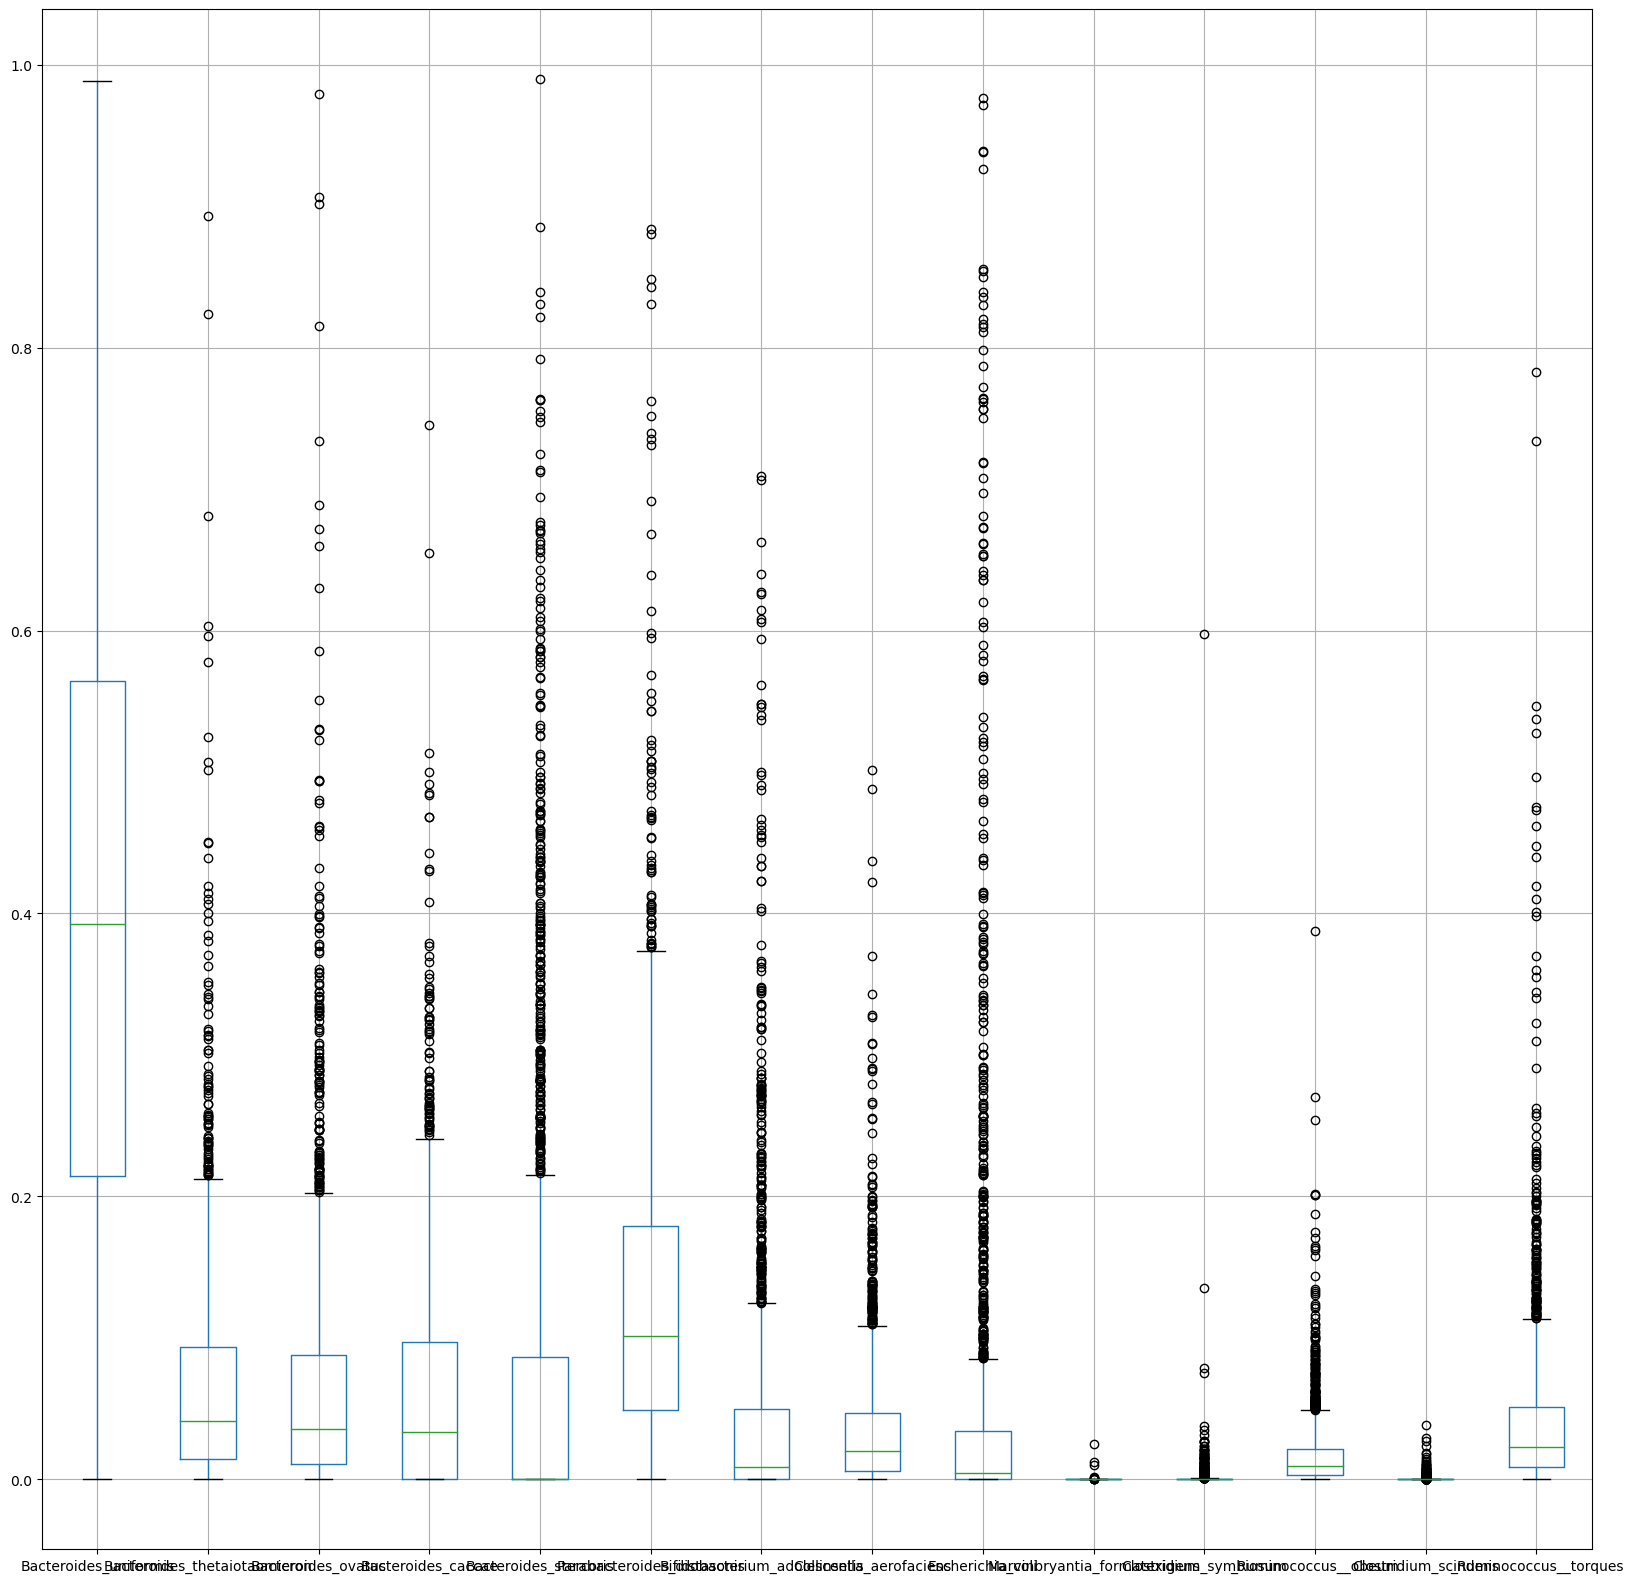

In [41]:
fig = plt.figure(figsize=(20, 20))
mydata_species_table_selected_norm.boxplot()
#plt.savefig( 'phylum_distribution.pdf',
#                format='pdf',
#                bbox_inches='tight')

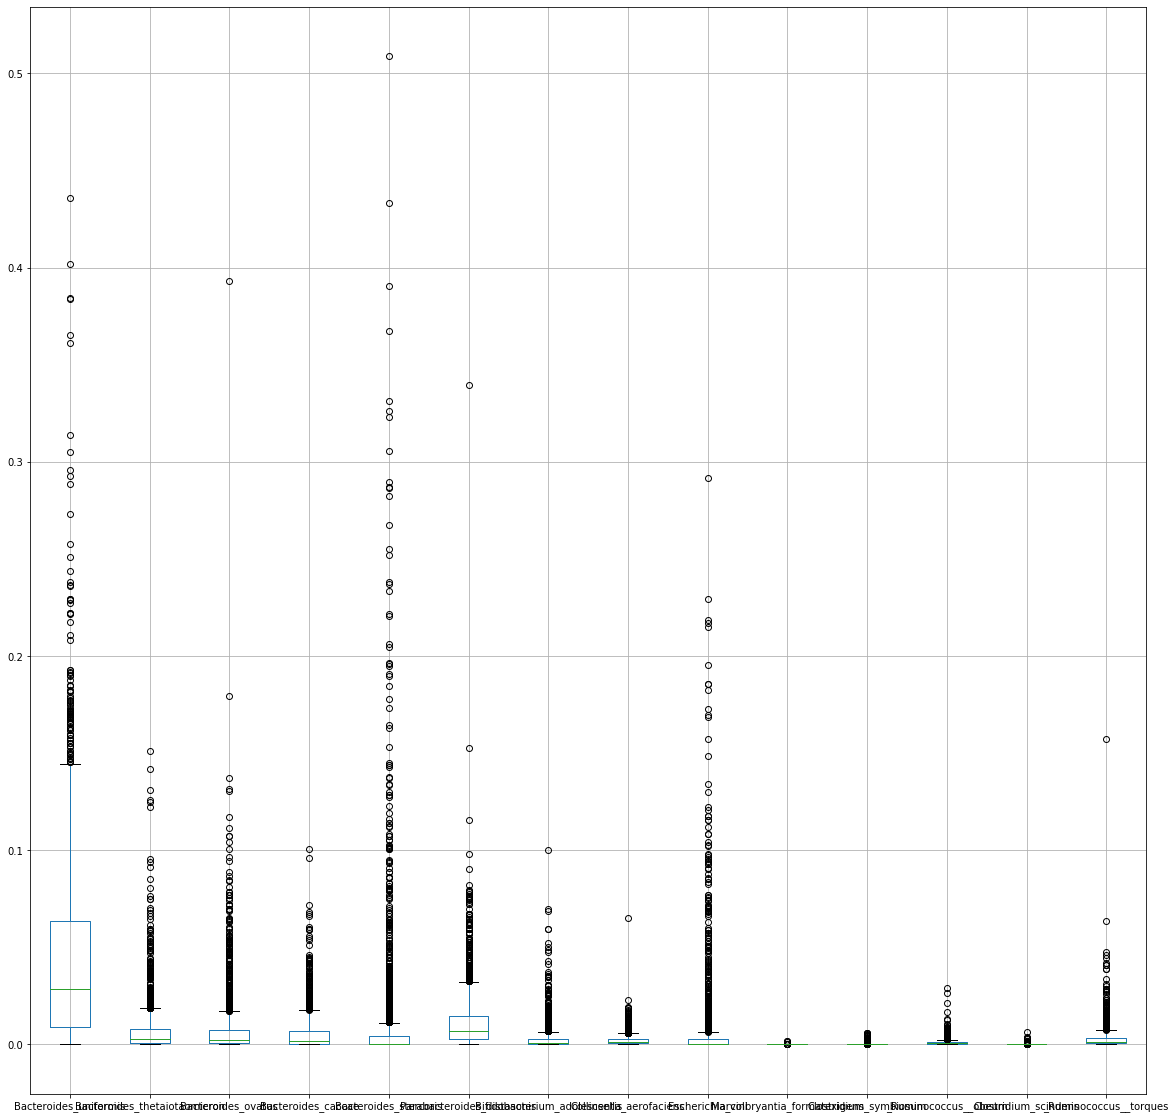

In [52]:
fig = plt.figure(figsize=(20, 20))
mydata_species_table_selected.boxplot()
#plt.savefig( 'phylum_distribution.pdf',
#                format='pdf',
#                bbox_inches='tight')

### Read OTU table to map species relative abundance in the mice to the one in the humans

In [55]:
mouse_data_folder = '..\\ProcessedData\\sequencing\\'
otu_table = pd.read_csv(mouse_data_folder + 'merged_humann2_metaphlan_bugs_list_mouseDNA_OTUs.txt',
                    sep='\t')

In [194]:
otu_table_phyla = otu_table[(otu_table['ID'].str.find('|p_')>0) & (otu_table['ID'].str.find('|c_')<0) ]

In [195]:
otu_table_phyla = otu_table_phyla.melt(id_vars="ID")

In [196]:
#otu_table_phyla.set_index("ID",drop=True, inplace=True)

In [197]:
otu_table_phyla.value=otu_table_phyla.value.astype(float)

In [198]:
# rename names of phyla
otu_table_phyla.ID = [x[x.find('p__')+3:] for x in otu_table_phyla.ID]

In [199]:
# remove Verrucomicrobia and Viruses
otu_table_phyla = otu_table_phyla[(~otu_table_phyla['ID'].str.contains('Verruco')) & 
                                  (~otu_table_phyla['ID'].str.contains('Viruses'))]

In [200]:
# normalize to 1
otu_table_phyla.loc[:,'value'] = otu_table_phyla.loc[:,'value']/100

In [154]:
import seaborn as sns

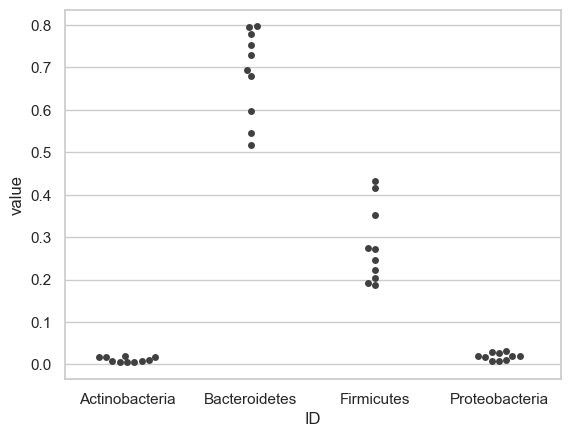

In [201]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

#ax = sns.boxplot(x="ID", y="value", data=otu_table_phyla, showfliers = False)
ax = sns.swarmplot(x="ID", y="value", data=otu_table_phyla, color=".25")

plt.show()

In [217]:
# to plot human and mouse data together, rename Actinobateria to 1, Bacteroidetes to 2, Firmicutes to 3 and Proteobacteria to 4
otu_table_phyla_plot = otu_table_phyla.copy()
otu_table_phyla_plot.ID = otu_table_phyla_plot.ID.replace(['Actinobacteria',
                                                        'Bacteroidetes',
                                                        'Firmicutes',
                                                        'Proteobacteria'], [1, 2, 3, 4])
otu_table_phyla_plot

,ID,variable,value
0,1,MSZ11_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.016872
1,2,MSZ11_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.680629
2,3,MSZ11_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.273597
3,4,MSZ11_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.027932
6,1,MSZ12_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.017566
7,2,MSZ12_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.597101
8,3,MSZ12_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.351248
9,4,MSZ12_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.032483
12,1,MSZ13_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.018398
13,2,MSZ13_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.545465


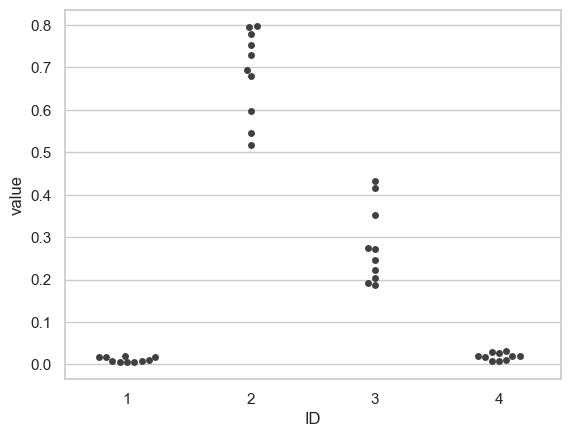

In [218]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

#ax = sns.boxplot(x="ID", y="value", data=otu_table_phyla, showfliers = False)
ax = sns.swarmplot(x="ID", y="value", data=otu_table_phyla_plot, color=".25")

plt.show()

In [278]:
# prepare human data for plotting
mydatatable_norm_plot =  mydatatable_norm.loc[:,['Actinobacteria', 'Bacteroidetes', 
                                    'Firmicutes', 'Proteobacteria']]

In [279]:
# normalize by four phyla 
mydatatable_norm_plot_phyla = mydatatable_norm_plot.div(mydatatable_norm_plot.sum(axis=1), axis=0)

mydatatable_norm_plot_phyla.rename(columns={'Actinobacteria': 1,
                                      'Bacteroidetes': 2,
                                      'Firmicutes': 3,
                                      'Proteobacteria': 4}, inplace=True)
mydatatable_norm_plot_phyla = mydatatable_norm_plot_phyla.melt()

In [280]:
# use original relative abundances 
mydatatable_norm_plot.rename(columns={'Actinobacteria': 1,
                                      'Bacteroidetes': 2,
                                      'Firmicutes': 3,
                                      'Proteobacteria': 4}, inplace=True)
mydatatable_norm_plot = mydatatable_norm_plot.melt()

C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mazimmer\AppData\Local\anac

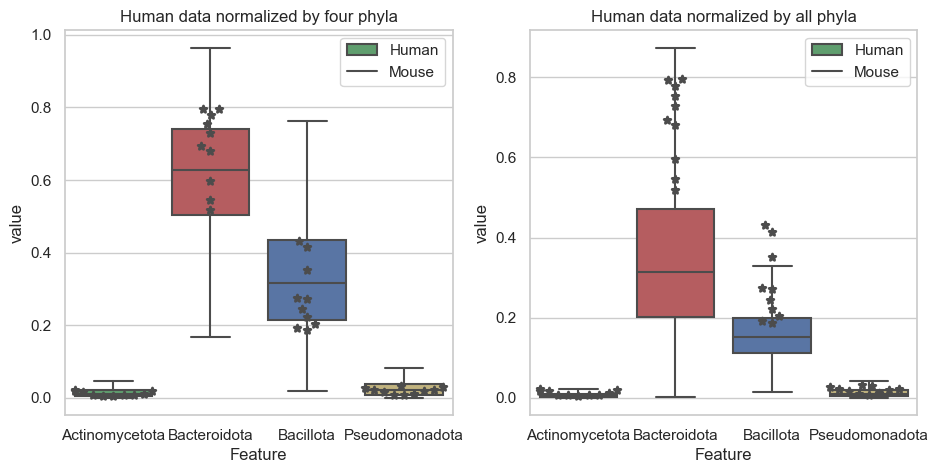

In [297]:
# plot distributions of relative phylum abundances in human samples
f, [ax1, ax2] = plt.subplots(1,2, figsize=(11,5), )
# define colors for different phyla
my_colors = {1: "g", 2: "r", 3:"b", 4: "y"}

# first plot relative abundances normalized by the four phyla
# plot human data distributions
sns.boxplot(x="Feature", y="value", data=mydatatable_norm_plot_phyla, palette=my_colors, showfliers = False ,ax=ax1)
# plot mouse data samples
g = sns.swarmplot(x="ID", y="value", data=otu_table_phyla_plot, marker="*", linewidth=2,ax=ax1)
# set legend
#g.set_xticklabels(['Actinobacteria', 'Bacteroidetes', 'Firmicutes', 'Proteobacteria'])
g.set_xticklabels(['Actinomycetota', 'Bacteroidota', 'Bacillota', 'Pseudomonadota'])
ax1.legend(['Human', 'Mouse'])
ax1.set_title('Human data normalized by four phyla')

# next plot original human data relative abundances
# plot human data distributions
sns.boxplot(x="Feature", y="value", data=mydatatable_norm_plot, palette=my_colors, showfliers = False ,ax=ax2)
# plot mouse data samples
g = sns.swarmplot(x="ID", y="value", data=otu_table_phyla_plot, marker="*", linewidth=2,ax=ax2)
# set legend
g.set_xticklabels(['Actinomycetota', 'Bacteroidota', 'Bacillota', 'Pseudomonadota'])
ax2.legend(['Human', 'Mouse'])
ax2.set_title('Human data normalized by all phyla')

# save picture
plt.savefig( figure_folder + 'metacardis_phylum_distribution_with_mouse_data.pdf',
                format='pdf',
                bbox_inches='tight')

### Read KEGG modules to compare metabolic/functional potential

In [44]:
mydata_KEGG = pd.read_csv(human_data_folder + 'hub.adjusted_KEGG_module.down.10000000.v3.data.frame.r',
                    sep='\t')

In [45]:
len(set(mydata_KEGG.FeatureDisplayName))

660

In [46]:
mydata_KEGG = pd.pivot_table(mydata_KEGG, values='FeatureValue',
                             index=['FeatureDisplayName'],
                            columns = ['SampleID'])

In [47]:
mydata_KEGG = mydata_KEGG>0

In [48]:
mydata_KEGG.sum()

SampleID
x10MCx1134    567
x10MCx1135    547
x10MCx1138    532
x10MCx1140    552
x10MCx1143    540
             ... 
x30MCx3394    556
x30MCx3412    547
x30MCx3414    604
x30MCx3422    564
x30MCx3423    600
Length: 1901, dtype: int64

In [49]:
np.min(mydata_KEGG.sum())

488

In [50]:
np.max(mydata_KEGG.sum())

617

In [51]:
mydata_KEGG = mydata_KEGG.drop(index=['-1'])

In [319]:
mydata_species_table_selected_prevalence.index

Index(['x10MCx1134', 'x10MCx1135', 'x10MCx1138', 'x10MCx1140', 'x10MCx1143',
       'x10MCx1144', 'x10MCx1145', 'x10MCx1146', 'x10MCx1151', 'x10MCx1153',
       ...
       'x30MCx3375', 'x30MCx3376', 'x30MCx3379', 'x30MCx3382', 'x30MCx3384',
       'x30MCx3394', 'x30MCx3412', 'x30MCx3414', 'x30MCx3422', 'x30MCx3423'],
      dtype='object', name='SampleID', length=1862)

In [316]:
# select columns based on data from metagenomics OTUS
select_columns_human = 

In [320]:
mydata_KEGG = mydata_KEGG.loc[:, mydata_species_table_selected_prevalence.index]

In [321]:
mydata_KEGG.shape

(659, 1862)

Read eggNOG genome annotations

In [299]:
genomeFolder = '..\\InputData\\genomes14_eggnog\\'
onlyfiles = [f for f in listdir(genomeFolder) if isfile(join(genomeFolder, f))]

In [300]:
keggmodules_df_joint = []
for myfile in onlyfiles:
    mydata_genome = pd.read_csv(genomeFolder + '\\' + myfile,
                    sep='\t', skiprows=4, header=None) 
    keggmodules = mydata_genome.iloc[:,10]
    # remove unnannotated
    keggmodules = list(keggmodules.dropna())
    # split and keep unique module names
    keggmodules = list(set([x for xs in keggmodules for x in xs.split(',')]))
    keggmodules_df = pd.DataFrame(1, index=keggmodules, columns=[myfile])
    if len(keggmodules_df_joint)==0:
        keggmodules_df_joint = keggmodules_df.copy()
    else:
        keggmodules_df_joint = keggmodules_df_joint.add(keggmodules_df,fill_value=0)

In [301]:
#mydata_genome = pd.read_csv(genomeFolder + '\Rtor_job_MM_k9659i1d_annotations.tsv',
#                    sep='\t', skiprows=4, header=None) 

In [302]:
# fill nas with 0 in all columns
keggmodules_df_joint = keggmodules_df_joint.fillna(0)

In [303]:
#sort by sum of 1 in columns 
s = keggmodules_df_joint.sum()
keggmodules_df_joint = keggmodules_df_joint[s.sort_values(ascending=True).index]

In [304]:
keggmodules_df_joint_sum = keggmodules_df_joint.copy()
for i in range(1,keggmodules_df_joint_sum.shape[1]):
    keggmodules_df_joint_sum.iloc[:,i] = keggmodules_df_joint_sum.iloc[:,i] + keggmodules_df_joint_sum.iloc[:,i-1]

In [305]:
keggmodules_df_joint_sum = keggmodules_df_joint_sum.clip(0,1)

In [306]:
keggmodules_df_joint['Ecol_job_MM_zytof08m_annotations.tsv'].sum()

359.0

In [307]:
keggmodules_df_joint_sum['Ecol_job_MM_zytof08m_annotations.tsv'].sum()

486.0

In [308]:
keggmodules_df_joint.sum()

Bado_job_MM_b7bducjs_annotations.tsv    208.0
Caer_job_MM_m4r45lgn_annotations.tsv    216.0
Rtor_job_MM_k9659i1d_annotations.tsv    226.0
Bste_job_MM_qm0yvy7j_annotations.tsv    234.0
Bobe_job_MM_basuua3b_annotations.tsv    242.0
Bcac_job_MM_w5lxxvou_annotations.tsv    245.0
Buni_job_MM_vm_dztk6_annotations.tsv    252.0
Bthe_job_MM_tpt9epfc_annotations.tsv    253.0
Bova_job_MM_yzguie9o_annotations.tsv    256.0
Pdis_job_MM_ujnclh_z_annotations.tsv    257.0
Mfor_job_MM_r7_0p66z_annotations.tsv    263.0
Csci_job_MM_k3nkbpw7_annotations.tsv    267.0
Csym_job_MM_nfwroj53_annotations.tsv    301.0
Ecol_job_MM_zytof08m_annotations.tsv    359.0
dtype: float64

In [309]:
keggmodules_df_joint_sum.sum()

Bado_job_MM_b7bducjs_annotations.tsv    208.0
Caer_job_MM_m4r45lgn_annotations.tsv    268.0
Rtor_job_MM_k9659i1d_annotations.tsv    304.0
Bste_job_MM_qm0yvy7j_annotations.tsv    346.0
Bobe_job_MM_basuua3b_annotations.tsv    365.0
Bcac_job_MM_w5lxxvou_annotations.tsv    373.0
Buni_job_MM_vm_dztk6_annotations.tsv    376.0
Bthe_job_MM_tpt9epfc_annotations.tsv    378.0
Bova_job_MM_yzguie9o_annotations.tsv    383.0
Pdis_job_MM_ujnclh_z_annotations.tsv    389.0
Mfor_job_MM_r7_0p66z_annotations.tsv    405.0
Csci_job_MM_k3nkbpw7_annotations.tsv    429.0
Csym_job_MM_nfwroj53_annotations.tsv    451.0
Ecol_job_MM_zytof08m_annotations.tsv    486.0
dtype: float64

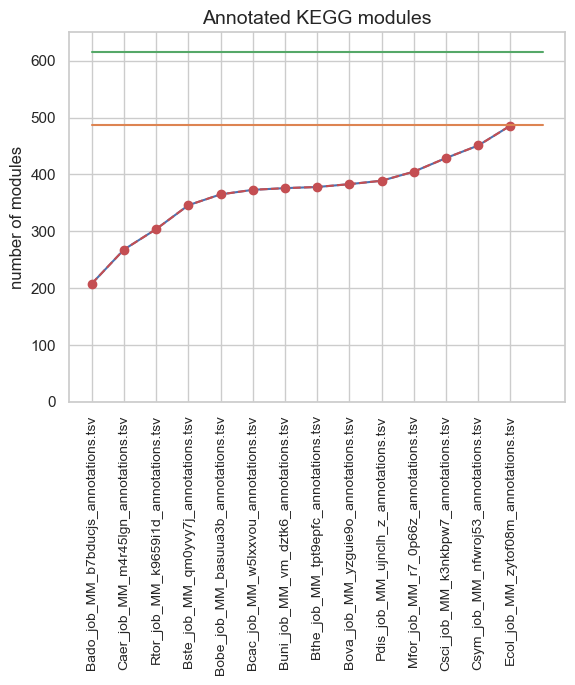

In [322]:
fig, ax = plt.subplots()
ax.plot(keggmodules_df_joint_sum.sum(), '-')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.plot(keggmodules_df_joint_sum.sum(), marker='o', linestyle='--', color='r')

plt.plot([0, 14], [np.min(mydata_KEGG.sum()),np.min(mydata_KEGG.sum())])
plt.plot([0, 14], [np.max(mydata_KEGG.sum()),np.max(mydata_KEGG.sum())])
ax.set_ylim([0, 650]) 
#ax.set_aspect('equal')#, 'box')
# Add labels and title
#plt.xlabel('x', fontsize=12)
plt.ylabel('number of modules', fontsize=12)
plt.title('Annotated KEGG modules', fontsize=14)
plt.savefig( figure_folder + 'kegg_modules_cumulative_species.pdf',
                format='pdf',
                bbox_inches='tight')

In [323]:
#keggmodules_df_joint.to_csv('testjoint.csv')
#keggmodules_df_joint_sum.to_csv('testjoint_sum.csv')
keggmodules_df_joint_sum

,Bado_job_MM_b7bducjs_annotations.tsv,Caer_job_MM_m4r45lgn_annotations.tsv,Rtor_job_MM_k9659i1d_annotations.tsv,Bste_job_MM_qm0yvy7j_annotations.tsv,Bobe_job_MM_basuua3b_annotations.tsv,Bcac_job_MM_w5lxxvou_annotations.tsv,Buni_job_MM_vm_dztk6_annotations.tsv,Bthe_job_MM_tpt9epfc_annotations.tsv,Bova_job_MM_yzguie9o_annotations.tsv,Pdis_job_MM_ujnclh_z_annotations.tsv,Mfor_job_MM_r7_0p66z_annotations.tsv,Csci_job_MM_k3nkbpw7_annotations.tsv,Csym_job_MM_nfwroj53_annotations.tsv,Ecol_job_MM_zytof08m_annotations.tsv
M00001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00002,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00003,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00004,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00005,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M00841,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00842,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00843,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00844,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [324]:
# calculate overlap of modules for each sample
num_overlap_kegg = []
percent_overlap_kegg = []

for cursample in mydata_KEGG.columns:
    curmodules = mydata_KEGG.loc[mydata_KEGG[cursample]==True, cursample]
    num_overlap = len(set(curmodules.index).intersection(keggmodules_df_joint_sum.index))
    num_overlap_kegg.append(num_overlap)
    percent_overlap_kegg.append(100*num_overlap/curmodules.shape[0])

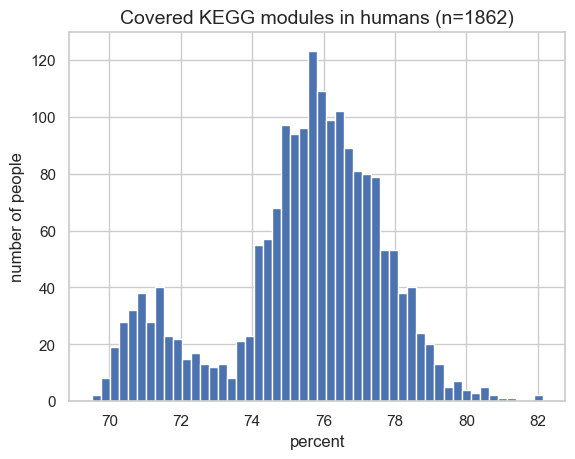

In [325]:
fig, ax = plt.subplots()
ax.hist(percent_overlap_kegg, bins=50)
ax.set_ylim([0, 130]) 
#ax.set_aspect('equal')#, 'box')
# Add labels and title
plt.xlabel('percent', fontsize=12)
plt.ylabel('number of people', fontsize=12)
plt.title('Covered KEGG modules in humans (n='+str(mydata_KEGG.shape[1])+')', fontsize=14)
#plt.hist(percent_overlap_kegg, bins=50)
plt.savefig( figure_folder + 'kegg_modules_coverage_human.pdf',
                format='pdf',
                bbox_inches='tight')

In [327]:
np.mean(percent_overlap_kegg)

75.45590057341968

In [ ]:
np.mean(percent_overlap_kegg)